# Data Cleaning Notebook

---

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [300]:
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')
train_df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN

In [301]:
test_df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931,LwQ,153,0,1084,GasA,TA,Y,SBrkr,1084,793,0,1877,1,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1974.0,Unf,2,488,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575,Unf,0,529,1104,GasA,Ex,Y,SBrkr,1104,884,0,1988,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1966.0,RFn,2,480,TA,TA,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250,LwQ,492,210,952,GasA,Ex,Y,SBrkr,1211,0,0,1211,0,0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PCo

In [302]:
pd.set_option('display.max_columns', 101)
# code taken from https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe

In [303]:
train_df.columns = [col.replace(' ', '_').lower() for col in train_df.columns]
test_df.columns = [col.replace(' ', '_').lower() for col in test_df.columns]
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [304]:
test_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


---

## Step 1 - Get rid of nulls

In [305]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [306]:
train_nulls = train_df.isnull().sum()
train_nulls.sort_values(ascending=False).head(25)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
dtype: int64

In [307]:
test_nulls = test_df.isnull().sum()
test_nulls.sort_values(ascending=False).head(25)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_2     25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
kitchen_abvgr       0
totrms_abvgrd       0
bedroom_abvgr       0
half_bath           0
full_bath           0
bsmt_half_bath      0
dtype: int64

In [308]:
drop_columns = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu']
train_df.drop(columns=drop_columns, inplace=True)
test_df.drop(columns=drop_columns, inplace=True)
# dropped columns where ~50% of the column where null values

In [309]:
train_df['lot_frontage'].mean()

69.05520046484602

In [310]:
test_df['lot_frontage'].mean()

69.54596100278552

In [311]:
train_df['lot_frontage'].median()

68.0

In [312]:
test_df['lot_frontage'].median()

68.0

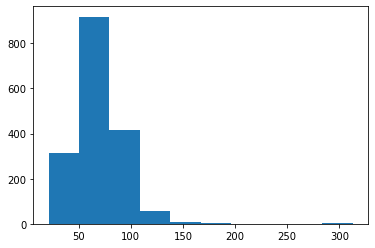

In [313]:
plt.hist(train_df['lot_frontage']);

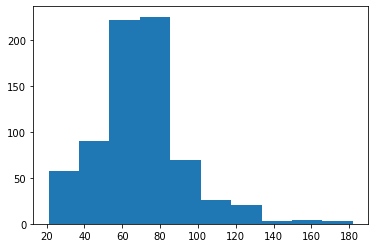

In [314]:
plt.hist(test_df['lot_frontage']);

In [315]:
train_df['lot_frontage'].fillna(train_df['lot_frontage'].median(), inplace=True)
test_df['lot_frontage'].fillna(test_df['lot_frontage'].median(), inplace=True)
# fix 'lot_frontage' column by setting nulls = median of column because they were equal in both test and train datasets
# and distribution seems fairly normal in both data sets

In [316]:
train_df['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [317]:
train_df['garage_finish'].fillna('NA', inplace=True)

In [318]:
train_df['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
NA     114
Name: garage_finish, dtype: int64

In [319]:
test_df['garage_finish'].value_counts()

Unf    382
RFn    233
Fin    218
Name: garage_finish, dtype: int64

In [320]:
test_df['garage_finish'].fillna('NA', inplace=True)

In [321]:
test_df['garage_finish'].value_counts()

Unf    382
RFn    233
Fin    218
NA      45
Name: garage_finish, dtype: int64

In [322]:
train_df['garage_qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [323]:
train_df['garage_qual'].fillna('NA', inplace=True)

In [324]:
train_df['garage_qual'].value_counts()

TA    1832
NA     114
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [325]:
test_df['garage_qual'].value_counts()

TA    782
Fa     42
Gd      6
Po      3
Name: garage_qual, dtype: int64

In [326]:
test_df['garage_qual'].fillna('NA', inplace=True)

In [327]:
test_df['garage_qual'].value_counts()

TA    782
NA     45
Fa     42
Gd      6
Po      3
Name: garage_qual, dtype: int64

In [328]:
train_df['garage_cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [329]:
train_df['garage_cond'].fillna('NA', inplace=True)

In [330]:
train_df['garage_cond'].value_counts()

TA    1868
NA     114
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [331]:
test_df['garage_cond'].value_counts()

TA    796
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64

In [332]:
test_df['garage_cond'].fillna('NA', inplace=True)

In [333]:
test_df['garage_cond'].value_counts()

TA    796
NA     45
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64

In [334]:
train_df['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [335]:
train_df['garage_type'].fillna('NA', inplace=True)

In [336]:
train_df['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [337]:
test_df['garage_type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     53
Basment      9
CarPort      4
2Types       4
Name: garage_type, dtype: int64

In [338]:
test_df['garage_type'].fillna('NA', inplace=True)

In [339]:
test_df['garage_type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     53
NA          44
Basment      9
CarPort      4
2Types       4
Name: garage_type, dtype: int64

In [340]:
train_df.loc[(train_df['garage_yr_blt'].isnull() == True) & (train_df['garage_type'] != 'NA'), 'garage_type'] = 'NA'
# row matched with other rows with no garage, changed garage type to NA to match with rest of data in row

In [341]:
test_df.loc[(test_df['garage_yr_blt'].isnull() == True) & (test_df['garage_type'] != 'NA'), 'garage_type'] = 'NA'

In [342]:
train_df['garage_yr_blt'].fillna(train_df['garage_yr_blt'].median(), inplace=True)

In [343]:
test_df['garage_yr_blt'].fillna(test_df['garage_yr_blt'].median(), inplace=True)

In [344]:
train_nulls = train_df.isnull().sum()
train_nulls.sort_values(ascending=False).head(25)

bsmt_exposure      58
bsmtfin_type_2     56
bsmt_cond          55
bsmt_qual          55
bsmtfin_type_1     55
mas_vnr_type       22
mas_vnr_area       22
bsmt_full_bath      2
bsmt_half_bath      2
garage_cars         1
garage_area         1
total_bsmt_sf       1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
kitchen_qual        0
full_bath           0
half_bath           0
bedroom_abvgr       0
gr_liv_area         0
low_qual_fin_sf     0
kitchen_abvgr       0
functional          0
totrms_abvgrd       0
1st_flr_sf          0
dtype: int64

In [345]:
test_nulls = test_df.isnull().sum()
test_nulls.sort_values(ascending=False).head(25)

bsmt_cond          25
bsmtfin_type_1     25
bsmt_qual          25
bsmt_exposure      25
bsmtfin_type_2     25
mas_vnr_type        1
mas_vnr_area        1
electrical          1
bsmt_full_bath      0
gr_liv_area         0
totrms_abvgrd       0
low_qual_fin_sf     0
bsmt_half_bath      0
full_bath           0
half_bath           0
2nd_flr_sf          0
1st_flr_sf          0
bedroom_abvgr       0
kitchen_abvgr       0
kitchen_qual        0
id                  0
central_air         0
fireplaces          0
yr_sold             0
mo_sold             0
dtype: int64

In [346]:
train_df['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [347]:
train_df['bsmt_exposure'].fillna('NA', inplace=True)

In [348]:
train_df['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
NA      58
Name: bsmt_exposure, dtype: int64

In [349]:
test_df['bsmt_exposure'].value_counts()

No    567
Av    130
Gd     80
Mn     76
Name: bsmt_exposure, dtype: int64

In [350]:
test_df['bsmt_exposure'].fillna('NA', inplace=True)

In [351]:
test_df['bsmt_exposure'].value_counts()

No    567
Av    130
Gd     80
Mn     76
NA     25
Name: bsmt_exposure, dtype: int64

In [352]:
train_df['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [353]:
train_df['bsmtfin_type_2'].fillna('NA', inplace=True)

In [354]:
train_df['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
NA       56
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [355]:
test_df['bsmtfin_type_2'].value_counts()

Unf    749
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: bsmtfin_type_2, dtype: int64

In [356]:
test_df['bsmtfin_type_2'].fillna('NA', inplace=True)

In [357]:
test_df['bsmtfin_type_2'].value_counts()

Unf    749
LwQ     29
Rec     26
NA      25
BLQ     20
ALQ     18
GLQ     11
Name: bsmtfin_type_2, dtype: int64

In [358]:
train_df['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [359]:
train_df['bsmt_cond'].fillna('NA', inplace=True)

In [360]:
train_df['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
NA      55
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [361]:
test_df['bsmt_cond'].value_counts()

TA    781
Fa     39
Gd     33
Name: bsmt_cond, dtype: int64

In [362]:
test_df['bsmt_cond'].fillna('NA', inplace=True)

In [363]:
test_df['bsmt_cond'].value_counts()

TA    781
Fa     39
Gd     33
NA     25
Name: bsmt_cond, dtype: int64

In [364]:
train_df['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [365]:
train_df['bsmt_qual'].fillna('NA', inplace=True)

In [366]:
train_df['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
NA     55
Po      1
Name: bsmt_qual, dtype: int64

In [367]:
test_df['bsmt_qual'].value_counts()

TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: bsmt_qual, dtype: int64

In [368]:
test_df['bsmt_qual'].fillna('NA', inplace=True)

In [369]:
test_df['bsmt_qual'].value_counts()

TA    396
Gd    355
Ex     73
Fa     28
NA     25
Po      1
Name: bsmt_qual, dtype: int64

In [370]:
train_df['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [371]:
train_df['bsmtfin_type_1'].fillna('NA', inplace=True)

In [372]:
train_df['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      55
Name: bsmtfin_type_1, dtype: int64

In [373]:
test_df['bsmtfin_type_1'].value_counts()

Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: bsmtfin_type_1, dtype: int64

In [374]:
test_df['bsmtfin_type_1'].fillna('NA', inplace=True)

In [375]:
test_df['bsmtfin_type_1'].value_counts()

Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
NA      25
Name: bsmtfin_type_1, dtype: int64

In [376]:
train_nulls = train_df.isnull().sum()
train_nulls.sort_values(ascending=False).head(15)

mas_vnr_type       22
mas_vnr_area       22
bsmt_half_bath      2
bsmt_full_bath      2
garage_cars         1
garage_area         1
total_bsmt_sf       1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
low_qual_fin_sf     0
gr_liv_area         0
functional          0
full_bath           0
half_bath           0
dtype: int64

In [377]:
test_nulls = test_df.isnull().sum()
test_nulls.sort_values(ascending=False).head(10)

electrical       1
mas_vnr_type     1
mas_vnr_area     1
id               0
full_bath        0
totrms_abvgrd    0
kitchen_qual     0
kitchen_abvgr    0
bedroom_abvgr    0
half_bath        0
dtype: int64

In [378]:
train_df.loc[(train_df['mas_vnr_type'].isnull() == True), 'mas_vnr_type'] = 'Unknwn'

In [379]:
train_df['mas_vnr_type'].isnull().sum()

0

In [380]:
test_df.loc[(test_df['mas_vnr_type'].isnull() == True), 'mas_vnr_type'] = 'Unknwn'

In [381]:
test_df['mas_vnr_type'].isnull().sum()

0

In [382]:
train_df['mas_vnr_area'].fillna(0, inplace=True) 

In [383]:
test_df['mas_vnr_area'].fillna(0, inplace=True)

In [384]:
train_nulls = train_df.isnull().sum()
train_nulls.sort_values(ascending=False).head(15)

bsmt_full_bath     2
bsmt_half_bath     2
bsmtfin_sf_1       1
garage_cars        1
garage_area        1
total_bsmt_sf      1
bsmtfin_sf_2       1
bsmt_unf_sf        1
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
functional         0
electrical         0
full_bath          0
dtype: int64

In [385]:
train_df.dropna(inplace=True)

In [386]:
test_nulls = test_df.isnull().sum()
test_nulls.sort_values(ascending=False).head(15)

electrical         1
id                 0
bsmt_half_bath     0
totrms_abvgrd      0
kitchen_qual       0
kitchen_abvgr      0
bedroom_abvgr      0
half_bath          0
full_bath          0
bsmt_full_bath     0
fireplaces         0
gr_liv_area        0
low_qual_fin_sf    0
2nd_flr_sf         0
1st_flr_sf         0
dtype: int64

In [387]:
test_df[test_df['electrical'].isnull() == True]  
# cannot find way to rid null value
# will not use electrical column as feature in model

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
634,1578,916386080,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD


---

## Step 2 - Check for outliers

<AxesSubplot:>

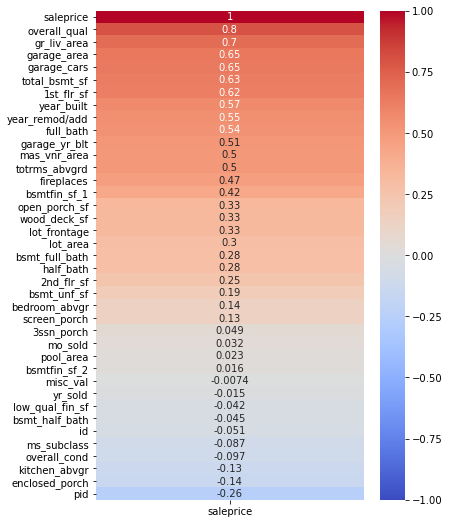

In [388]:
plt.figure(figsize=(6,9))
sns.heatmap(train_df.corr()[['saleprice']].sort_values('saleprice', ascending=False),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

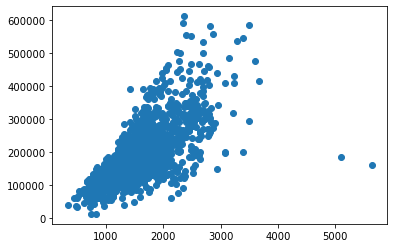

In [389]:
plt.scatter(train_df['gr_liv_area'], train_df['saleprice'])

In [390]:
train_df[train_df['gr_liv_area'] > 4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,183850


In [391]:
train_df.drop([960, 1885], inplace=True)

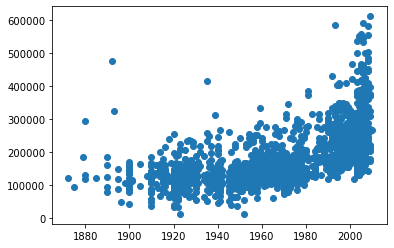

In [392]:
plt.scatter(train_df['year_built'], train_df['saleprice'])

In [393]:
train_df[(train_df['year_built'] < 1940) & (train_df['saleprice'] > 400000)]
# leaving these alone as remodels may have increased price

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1035,2667,902400110,75,RM,90.0,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0.0,0.0,2,1,4,1,Ex,12,Typ,2,Detchd,1993.0,Unf,3.0,840.0,Ex,TA,Y,0,260,0,0,410,0,0,6,2006,WD,475000
1897,2738,905427030,75,RL,60.0,19800,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2.5Unf,6,8,1935,1990,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,425.0,Unf,0.0,1411.0,1836.0,GasA,Gd,Y,SBrkr,1836,1836,0,3672,0.0,0.0,3,1,5,1,Gd,7,Typ,2,Detchd,1993.0,Unf,2.0,836.0,TA,TA,Y,684,80,32,0,0,0,0,12,2006,WD,415000


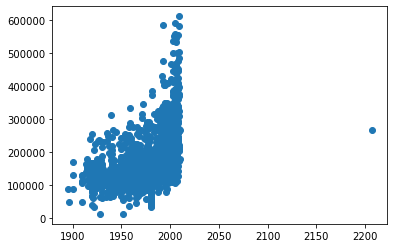

In [394]:
plt.scatter(train_df['garage_yr_blt'], train_df['saleprice'])

In [395]:
train_df[train_df['garage_yr_blt'] > 2050] # outlier looks like a typing error and should be 2007

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Unknwn,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,0,9,2007,New,267300


In [396]:
train_df.loc[1699, ['garage_yr_blt']] = [2007]

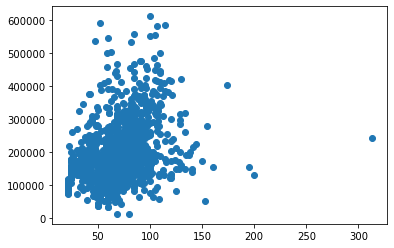

In [397]:
plt.scatter(train_df['lot_frontage'], train_df['saleprice'])

In [398]:
train_df[train_df['lot_frontage'] > 250]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1335,1266,535427070,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,2069,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Attchd,1960.0,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,0,11,2008,WD,242000


In [399]:
train_df.drop([1335], inplace=True)

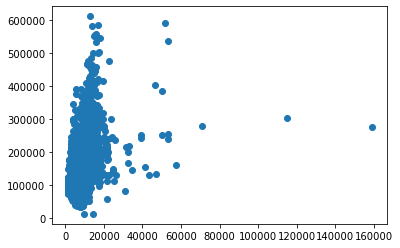

In [400]:
plt.scatter(train_df['lot_area'], train_df['saleprice'])

In [401]:
train_df[train_df['lot_area'] > 100000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
471,2116,906426060,50,RL,68.0,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,500,6,2007,WD,277000
694,2072,905301050,20,RL,68.0,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,0,6,2007,WD,302000


In [402]:
train_df.drop([471, 694], inplace=True)

In [403]:
test_df.describe()  # check which columns to remove from features

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,878.000000,8.780000e+02,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.264237,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.115034,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.823462,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,21.287538,10002.674602,1.369065,1.128903,30.395895,20.450725,187.086530,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.023493,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,60.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,78.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,171.750000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


---

## Step 3 - Discover which columns to use for creating models

In [404]:
train_df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2043.000000,2.043000e+03,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1472.849731,7.130142e+08,57.094958,68.586393,9876.044542,6.109643,5.559961,1971.728830,1984.139501,97.621145,437.676456,48.123348,568.110622,1053.910426,1158.875673,329.377386,5.534508,1493.787567,0.426334,0.062653,1.575624,0.371023,2.842389,1.043074,6.427313,0.587372,1978.701419,1.775820,472.793930,93.558003,47.109643,22.556535,2.601566,16.576114,2.172296,43.210475,6.220754,2007.776799,181358.247186
std,845.077388,1.886792e+08,42.867548,19.841111,5164.069571,1.422404,1.104573,30.187058,21.030565,171.843694,439.891451,165.259537,445.230077,425.732263,374.072580,425.714049,51.167641,483.094250,0.521649,0.250348,0.548824,0.501108,0.825419,0.210183,1.541136,0.634139,24.220804,0.765095,214.605524,128.148049,65.526988,59.800911,25.278466,57.477155,36.350221,434.996518,2.742940,1.314095,79259.757579
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,751.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129650.000000
50%,1480.000000,5.354531e+08,50.000000,68.000000,9400.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,475.000000,994.000000,1092.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2199.500000,9.071756e+08,70.000000,78.000000,11496.000000,7.000000,6.000000,2001.000000,2004.000000,158.000000,733.000000,0.000000,811.000000,1316.500000,1402.000000,690.500000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,200.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,1862.000000,1064.000000,3672.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,14.000000,4.000000,2010.000000,5.000000,1356.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,12500.000000,12.000000,2010.000000,611657.000000


In [405]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2043 non-null   int64  
 1   pid              2043 non-null   int64  
 2   ms_subclass      2043 non-null   int64  
 3   ms_zoning        2043 non-null   object 
 4   lot_frontage     2043 non-null   float64
 5   lot_area         2043 non-null   int64  
 6   street           2043 non-null   object 
 7   lot_shape        2043 non-null   object 
 8   land_contour     2043 non-null   object 
 9   utilities        2043 non-null   object 
 10  lot_config       2043 non-null   object 
 11  land_slope       2043 non-null   object 
 12  neighborhood     2043 non-null   object 
 13  condition_1      2043 non-null   object 
 14  condition_2      2043 non-null   object 
 15  bldg_type        2043 non-null   object 
 16  house_style      2043 non-null   object 
 17  overall_qual  

In [406]:
train_df['ms_subclass'].unique(), test_df['ms_subclass'].unique()
# will not dummy because it train data will have more columns than test data

(array([ 60,  20,  50, 180, 160,  70, 120, 190,  85,  30,  90,  80,  75,
         45,  40, 150], dtype=int64),
 array([190,  90,  60,  30,  20, 160, 120,  70,  80,  50,  85,  45,  75,
        180,  40], dtype=int64))

In [407]:
train_df['ms_zoning'].unique(), test_df['ms_zoning'].unique()
# will not dummy because it train data will have more columns than test data

(array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
       dtype=object),
 array(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)'], dtype=object))

In [408]:
train_df['street'].unique(), test_df['street'].unique()   # can dummy or make bool

(array(['Pave', 'Grvl'], dtype=object), array(['Pave', 'Grvl'], dtype=object))

In [409]:
train_df['utilities'].unique(), test_df['utilities'].unique()
# will not dummy because it train data will have more columns than test data

(array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object),
 array(['AllPub', 'NoSewr'], dtype=object))

In [410]:
train_df['neighborhood'].unique(), test_df['neighborhood'].unique()
# will not dummy because it train data will have more columns than test data

(array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
        'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
        'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
        'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
        'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object),
 array(['OldTown', 'Sawyer', 'Gilbert', 'NAmes', 'MeadowV', 'CollgCr',
        'Somerst', 'Mitchel', 'SawyerW', 'IDOTRR', 'BrkSide', 'Edwards',
        'ClearCr', 'NWAmes', 'Timber', 'NoRidge', 'NridgHt', 'Crawfor',
        'StoneBr', 'Veenker', 'BrDale', 'SWISU', 'Blmngtn', 'NPkVill',
        'Greens', 'Blueste'], dtype=object))

In [411]:
train_df['bldg_type'].unique(), test_df['bldg_type'].unique() # can dummy

(array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object),
 array(['2fmCon', 'Duplex', '1Fam', 'TwnhsE', 'Twnhs'], dtype=object))

In [412]:
train_df['house_style'].unique(), test_df['house_style'].unique() # can dummy

(array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
        '1.5Unf'], dtype=object),
 array(['2Story', '1Story', '1.5Fin', 'SLvl', 'SFoyer', '2.5Fin', '2.5Unf',
        '1.5Unf'], dtype=object))

In [413]:
train_df['roof_style'].unique(), test_df['roof_style'].unique() # can dummy

(array(['Gable', 'Hip', 'Flat', 'Mansard', 'Shed', 'Gambrel'], dtype=object),
 array(['Gable', 'Hip', 'Gambrel', 'Flat', 'Mansard', 'Shed'], dtype=object))

In [414]:
train_df['roof_matl'].unique(), test_df['roof_matl'].unique()
# will not dummy because it train data will different columns than test data

(array(['CompShg', 'WdShngl', 'Tar&Grv', 'WdShake', 'Membran'],
       dtype=object),
 array(['CompShg', 'Metal', 'WdShake', 'Tar&Grv', 'WdShngl', 'Roll'],
       dtype=object))

In [415]:
train_df['exter_qual'].unique(), test_df['exter_qual'].unique() # need to give ordinal values

(array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object),
 array(['TA', 'Gd', 'Fa', 'Ex'], dtype=object))

In [416]:
train_df['exter_cond'].unique(), test_df['exter_cond'].unique() # need to give ordinal values

(array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object),
 array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object))

In [417]:
train_df['foundation'].unique(), test_df['foundation'].unique() # can dummy

(array(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'], dtype=object),
 array(['Stone', 'CBlock', 'PConc', 'BrkTil', 'Slab', 'Wood'], dtype=object))

In [418]:
train_df['bsmt_qual'].unique(), test_df['bsmt_qual'].unique() # need to give ordinal values

(array(['TA', 'Gd', 'Fa', 'NA', 'Ex', 'Po'], dtype=object),
 array(['Fa', 'Gd', 'TA', 'Ex', 'NA', 'Po'], dtype=object))

In [419]:
train_df['bsmt_cond'].unique(), test_df['bsmt_cond'].unique()
# will not dummy because it train data will have more columns than test data

(array(['TA', 'Gd', 'NA', 'Fa', 'Po', 'Ex'], dtype=object),
 array(['TA', 'Gd', 'NA', 'Fa'], dtype=object))

In [420]:
train_df['heating'].unique(), test_df['heating'].unique()
# will not dummy because it train data will have more columns than test data

(array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW'], dtype=object),
 array(['GasA', 'GasW', 'Grav', 'Floor'], dtype=object))

In [421]:
train_df['heating_qc'].unique(), test_df['heating_qc'].unique()
# will not dummy because it train data will have more columns than test data

(array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object),
 array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object))

In [422]:
train_df['central_air'].unique(), test_df['central_air'].unique() # can dummy or make bool

(array(['Y', 'N'], dtype=object), array(['N', 'Y'], dtype=object))

In [423]:
train_df['kitchen_qual'].unique(), test_df['kitchen_qual'].unique()
# will not dummy because it test data will have more columns than train data

(array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object),
 array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object))

In [424]:
train_df['functional'].unique(), test_df['functional'].unique()
# will not dummy because it train data will have more columns than test data

(array(['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
       dtype=object),
 array(['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Maj2'], dtype=object))

In [425]:
train_df['garage_type'].unique(), test_df['garage_type'].unique() # can dummy

(array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'NA', '2Types',
        'CarPort'], dtype=object),
 array(['Detchd', 'Attchd', 'BuiltIn', 'NA', '2Types', 'CarPort',
        'Basment'], dtype=object))

In [426]:
train_df['garage_finish'].unique(), test_df['garage_finish'].unique() # can dummy

(array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object),
 array(['Unf', 'Fin', 'RFn', 'NA'], dtype=object))

In [427]:
train_df['garage_qual'].unique(), test_df['garage_qual'].unique() 
# will not dummy because it train data will have more columns than test data

(array(['TA', 'Fa', 'NA', 'Gd', 'Ex', 'Po'], dtype=object),
 array(['Po', 'TA', 'Fa', 'NA', 'Gd'], dtype=object))

In [428]:
train_df['garage_cond'].unique(), test_df['garage_cond'].unique()  # need to give ordinal values

(array(['TA', 'Fa', 'NA', 'Po', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'TA', 'NA', 'Fa', 'Gd', 'Ex'], dtype=object))

In [429]:
train_df['paved_drive'].unique(), test_df['paved_drive'].unique() # can dummy

(array(['Y', 'N', 'P'], dtype=object), array(['Y', 'N', 'P'], dtype=object))

In [430]:
train_df['sale_type'].unique(), test_df['sale_type'].unique() 
# will not dummy because it test data will have more columns than train data

(array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
        'ConLw'], dtype=object),
 array(['WD ', 'New', 'Con', 'COD', 'VWD', 'CWD', 'ConLD', 'ConLI', 'Oth',
        'ConLw'], dtype=object))

---

## Step 4 - Create dummy columns and convert ordinal value columns to numeric

In [431]:
train_df = pd.get_dummies(train_df, columns=['street', 'bldg_type', 'house_style', 'roof_style', 'foundation',
                                            'central_air', 'garage_type', 'garage_finish', 'paved_drive'], 
                         drop_first=True)

test_df = pd.get_dummies(test_df, columns=['street', 'bldg_type', 'house_style', 'roof_style', 'foundation',
                                            'central_air', 'garage_type', 'garage_finish', 'paved_drive'], 
                         drop_first=True)

In [432]:
def ordinal_values(ordinal_cell):
    if ordinal_cell == 'NA':
        return 0
    elif ordinal_cell == 'Po':
        return 1
    elif ordinal_cell == 'Fa':
        return 2
    elif ordinal_cell == 'TA':
        return 3
    elif ordinal_cell == 'Gd':
        return 4
    else:
        return 5

In [433]:
train_df['exter_qual'] = train_df['exter_qual'].map(ordinal_values)
train_df['exter_cond'] = train_df['exter_cond'].map(ordinal_values)
train_df['bsmt_qual'] = train_df['bsmt_qual'].map(ordinal_values)
train_df['garage_cond'] = train_df['garage_cond'].map(ordinal_values)

In [434]:
test_df['exter_qual'] = test_df['exter_qual'].map(ordinal_values)
test_df['exter_cond'] = test_df['exter_cond'].map(ordinal_values)
test_df['bsmt_qual'] = test_df['bsmt_qual'].map(ordinal_values)
test_df['garage_cond'] = test_df['garage_cond'].map(ordinal_values)

In [435]:
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y
0,109,533352170,60,RL,68.0,13517,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976,2005,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,3,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,1976.0,2.0,475.0,TA,3,0,44,0,0,0,0,0,3,2010,WD,130500,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
1,544,531379050,60,RL,43.0,11492,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996,1997,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,4,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,1997.0,2.0,559.0,TA,3,0,74,0,0,0,0,0,4,2009,WD,220000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
2,153,535304180,20,RL,68.0,7922,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953,2007,CompShg,VinylSd,VinylSd,None,0.0,3,4,3,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,1953.0,1.0,246.0,TA,3,0,52,0,0,0,0,0,1,2010,WD,109000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,318,916386060,60,RL,73.0,9802,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006,2007,CompShg,VinylSd,VinylSd,None,0.0,3,3,4,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,2007.0,2.0,400.0,TA,3,100,0,0,0,0,0,0,4,2010,WD,174000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900,1993,CompShg,Wd Sdng,Plywood,None,0.0,3,3,2,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,1957.0,2.0,484.0,TA,3,0,59,0,0,0,0,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


<AxesSubplot:>

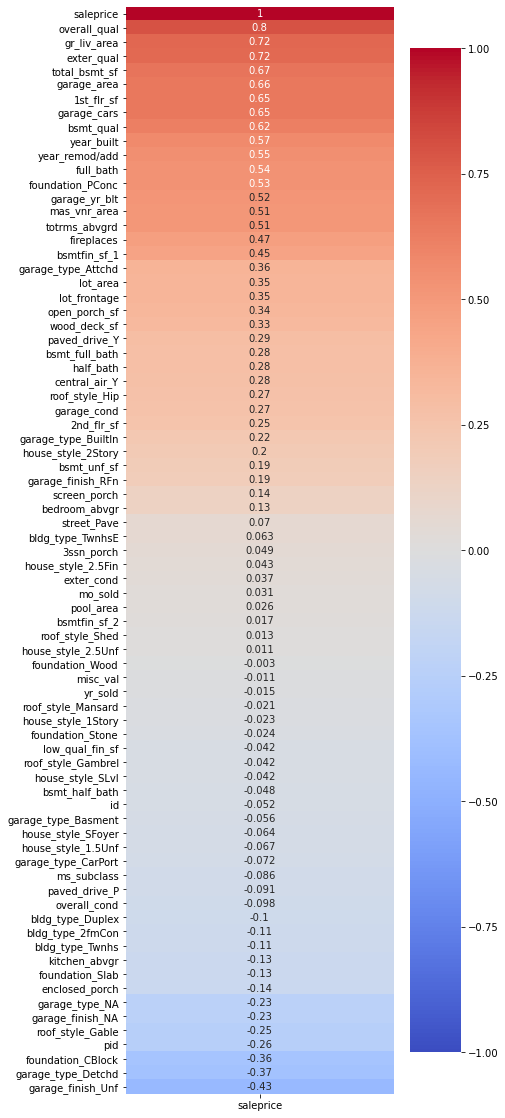

In [436]:
plt.figure(figsize=(6,20))
sns.heatmap(train_df.corr()[['saleprice']].sort_values('saleprice', ascending=False),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

<Figure size 576x576 with 0 Axes>

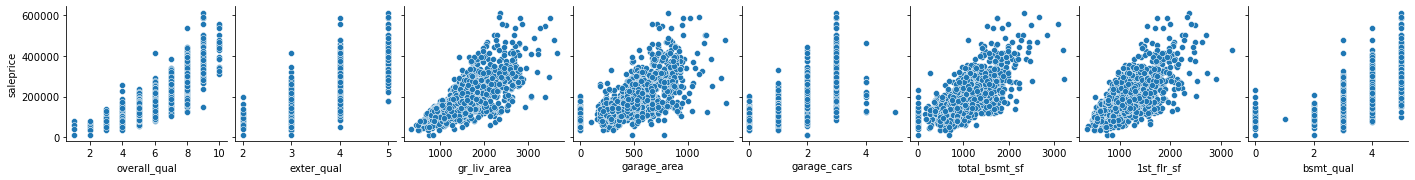

In [437]:
plt.figure(figsize=(8,8))
sns.pairplot(train_df, x_vars=['overall_qual', 'exter_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 
                                'total_bsmt_sf', '1st_flr_sf', 'bsmt_qual'], 
            y_vars=['saleprice'])

<Figure size 576x576 with 0 Axes>

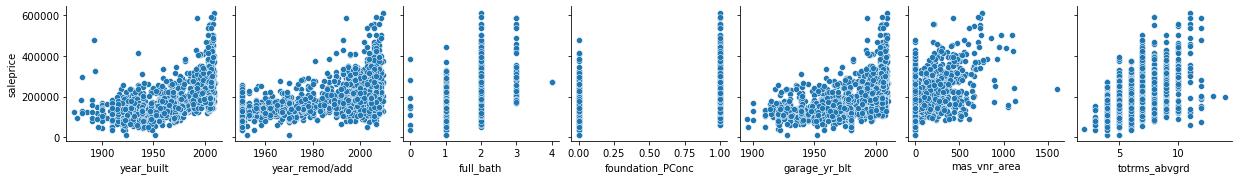

In [438]:
plt.figure(figsize=(8,8))
sns.pairplot(train_df, x_vars=['year_built', 'year_remod/add', 'full_bath', 'foundation_PConc', 'garage_yr_blt', 
                                'mas_vnr_area', 'totrms_abvgrd'], 
            y_vars=['saleprice'])

In [439]:
train_df.to_csv('./datasets/clean_train.csv', index=False)
test_df.to_csv('./datasets/clean_test.csv', index=False)

---

## Step 5 - feature engineering

In [440]:
train_df['overall_exter_qual'] = train_df['overall_qual'] * train_df['exter_qual']
train_df['overall_bsmt_qual'] = train_df['overall_qual'] * train_df['bsmt_qual']
train_df['exter_bsmt_qual'] = train_df['exter_qual'] * train_df['bsmt_qual']
train_df['overall_qual_squared'] = train_df['overall_qual'] ** 2
train_df['exter_qual_squared'] = train_df['exter_qual'] ** 2
train_df['bsmt_qual_squared'] = train_df['bsmt_qual'] ** 2

In [441]:
test_df['overall_exter_qual'] = test_df['overall_qual'] * test_df['exter_qual']
test_df['overall_bsmt_qual'] = test_df['overall_qual'] * test_df['bsmt_qual']
test_df['exter_bsmt_qual'] = test_df['exter_qual'] * test_df['bsmt_qual']
test_df['overall_qual_squared'] = test_df['overall_qual'] ** 2
test_df['exter_qual_squared'] = test_df['exter_qual'] ** 2
test_df['bsmt_qual_squared'] = test_df['bsmt_qual'] ** 2

In [442]:
train_df['garage_exter_cond'] = train_df['garage_cond'] * train_df['exter_cond']
train_df['garage_overall_cond'] = train_df['garage_cond'] * train_df['overall_cond']
train_df['exter_overall_cond'] = train_df['exter_cond'] * train_df['overall_cond']
train_df['garage_cond_squared'] = train_df['garage_cond'] ** 2
train_df['exter_cond_squared'] = train_df['exter_cond'] ** 2
train_df['overall_cond_squared'] = train_df['overall_cond'] ** 2

In [443]:
test_df['garage_exter_cond'] = test_df['garage_cond'] * test_df['exter_cond']
test_df['garage_overall_cond'] = test_df['garage_cond'] * test_df['overall_cond']
test_df['exter_overall_cond'] = test_df['exter_cond'] * test_df['overall_cond']
test_df['garage_cond_squared'] = test_df['garage_cond'] ** 2
test_df['exter_cond_squared'] = test_df['exter_cond'] ** 2
test_df['overall_cond_squared'] = test_df['overall_cond'] ** 2

**^^^Quality and Condition feature interactions**

---

In [444]:
train_df.to_csv('./datasets/clean_train_with_features.csv', index=False)
test_df.to_csv('./datasets/clean_test_with_features.csv', index=False)